---
title: "1. Getting data and data processing"
format: 
  html:
    toc: false
    page-layout: full
    code-fold: show
execute:
    echo: true
---

For our analysis, we need to collect data on the following variables.

*Dependent variables:*
1. GDP per capita
2. Life expectancy
3. Median household income
4. Education levels (we use percentage of population with bachelor’s degree as reference)

The dependent variables were selected because they are key measures related to the Human Development Index.

*Independent variables:*
1. Unemployment rate
2. Labour force participation rate
3. Labour Productivity (private non-farm)
4. Population
5. Poverty rate
6. Net exports by state

I also use the dependent variables as independent variables in the analysis. For example, when modelling the relation ship of GDP per capita against socioeconomic variables, life expectancy, median household income, and education levels become independent variables. This would enable us to explore which variables is more important in predicting the dependent variable.

## 1. Getting the data with API

In [1]:
#| output: false
!pip install cenpy
import cenpy
import numpy as np
np.random.seed(42)

### **1.1 ACS 5-Year Estimate by US States**

From cenpy we can access American Community Survey 5-Year data to obtain/derive the following socioeconomic variables: 
1. Median Household Income
2. Education Levels
3. Unemployment rate
4. Labour force participation rate
5. Population
6. Poverty rate

In [2]:
# Finding data set
available = cenpy.explorer.available()
available.head(n=5)

# We use data from ACS 5 Year, Monthly Export and Import

,c_isTimeseries,temporal,spatial,c_isAggregate,publisher,references,programCode,modified,license,keyword,...,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isMicrodata,c_documentationLink,c_dataset,vintage
ABSCB2017,NaN,2017/2017,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2020-04-30 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Annual Business Survey: Characteristics of Bus...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2017.0
ABSCB2018,NaN,2018/2018,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2020-10-26 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,Annual Business Survey: Characteristics of Bus...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2018.0
ABSCB2019,NaN,2019/2019,US,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2021-08-17 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,2019 Annual Business Survey: Characteristics o...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2019.0
ABSCB2020,NaN,2020/2020,US,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2022-08-03 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,2020 Annual Business Survey: Characteristics o...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2020.0
ABSCB2021,NaN,2021/2021,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:007,2023-07-24 10:30:52.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The Annual Business Survey (ABS) provides info...,006:07,public,2021 Annual Business Survey: Characteristics o...,True,NaN,NaN,https://www.census.gov/developer/,"(abscb,)",2021.0


We identify the dataset we want to use from cenpy. In this case it is ACSDT5Y.

In [3]:
acs = available.filter(regex="^ACS", axis=0)
available.filter(regex="^ACSDT5Y", axis=0).head(n=5)

,c_isTimeseries,temporal,spatial,c_isAggregate,publisher,references,programCode,modified,license,keyword,...,description,bureauCode,accessLevel,title,c_isAvailable,c_isCube,c_isMicrodata,c_documentationLink,c_dataset,vintage
ACSDT5Y2009,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2019-08-27 13:11:18.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,American Community Survey: 5-Year Estimates: D...,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2009.0
ACSDT5Y2010,NaN,NaN,United States,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2010.0
ACSDT5Y2011,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2011.0
ACSDT5Y2012,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2012.0
ACSDT5Y2013,NaN,NaN,NaN,True,U.S. Census Bureau,https://www.census.gov/developers/,006:004,2018-07-04 00:00:00.0,https://creativecommons.org/publicdomain/zero/...,"(census,)",...,The American Community Survey (ACS) is an ongo...,006:07,public,ACS 5-Year Detailed Tables,True,True,NaN,https://www.census.gov/developer/,"(acs, acs5)",2013.0


In [4]:
cenpy.explorer.explain("ACSDT5Y2023")
acs = cenpy.remote.APIConnection('ACSDT5Y2023')

In [5]:
acs.varslike(
    pattern="B19019_001E",
    by="attributes",
).sort_index()

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,attributes,required
B19019_001E,Estimate!!Total:,Median Household Income in the Past 12 Months ...,int,B19019,0,NaN,NaN,"B19019_001EA,B19019_001M,B19019_001MA",NaN


We then extract out the following variables. Since the variables are in object format, we will convert them to float. Rename the variables for clarity.

In [6]:
acs_variables = [
    "NAME",
    "GEO_ID",
    "B19019_001E", # Total Median Household Income
    "B06009_001E", # Educational Attainment- Total
    "B06009_002E", # Educational Attainment- Less than high school graduate
    "B06009_003E", # Educational Attainment- High school graduate (equivalent)
    "B06009_004E", # Educational Attainment- Some college or associate's degree
    "B06009_005E", # Educational Attainment- Bachelor's degree or higher
    "B01003_001E", # Total Population
    "B23025_001E", # Total Population above 16
    "B23025_002E", # Labor Force- Total
    "B23025_005E", # Labour Force- Unemployed
    "B17020_001E", # Population for whom poverty is determined
    "B17020_002E", # Population below poverty level
]




In [7]:
# Filter out the data for state
USA_acs_data = acs.query(
    cols=acs_variables,
    geo_unit="state:*",
)

USA_acs_data.head(n=5)

,NAME,GEO_ID,B19019_001E,B06009_001E,B06009_002E,B06009_003E,B06009_004E,B06009_005E,B01003_001E,B23025_001E,B23025_002E,B23025_005E,B17020_001E,B17020_002E,state
0,Alabama,0400000US01,62027,3448302,409381,1046374,1035466,584986,5054253,4056609,2358667,112849,4913932,768185,01
1,Alaska,0400000US02,89336,487903,31854,141206,162411,95793,733971,574021,380935,20644,716703,72978,02
2,Arizona,0400000US04,76872,4990633,544528,1171693,1646950,999535,7268175,5862117,3547314,182184,7109159,907125,04
3,Arkansas,0400000US05,58773,2043779,233857,702778,593923,324625,3032651,2409758,1405609,71269,2944742,471783,05
4,California,0400000US06,96334,26941198,4149146,5496195,7461496,6035609,39242785,31545603,20144078,1282259,38529452,4610600,06


In [8]:
for variable in acs_variables:
    # Convert all variables EXCEPT for NAME
    if variable not in ("NAME", "GEO_ID"):
        USA_acs_data[variable] = USA_acs_data[variable].astype(float)

In [9]:
USA_acs_data = USA_acs_data.rename(
    columns={
        "B19019_001E": "MedHHInc", # Total Median Household Income
        "B06009_001E": "EducTotal", # Educational Attainment- Total
        "B06009_002E": "EducBelowHighSch", # Educational Attainment- Less than high school graduate
        "B06009_003E": "EducHighSch", # Educational Attainment- High school graduate (equivalent)
        "B06009_004E": "EducAssoc", # Educational Attainment- Some college or associate's degree
        "B06009_005E": "EducBach", # Educational Attainment- Bachelor's degree or higher
        "B01003_001E": "TotalPop", # Total Population
        "B23025_001E": "TotalPop16", # Total Population above 16
        "B23025_002E": "LabForTotal", # Labor Force- Total
        "B23025_005E": "Unemployed", # Labour Force- Unemployed
        "B17020_001E": "PopPovertyDetermined", # Population for whom poverty is determined
        "B17020_002E": "PovertyPop", # Population below poverty level
    }
)

*Feature engineering:*

We apply feature engineering to derive the following socioeconomic variables: 1) education levels, 2) poverty rate, 3) unemployment rate, and 4) labour force participation rate.

In [10]:
USA_acs_data['PctBach'] = USA_acs_data['EducBach']/USA_acs_data['EducTotal']
USA_acs_data['PovertyRate'] = USA_acs_data['PovertyPop']/USA_acs_data['PopPovertyDetermined']
USA_acs_data['UnemploymentRate'] = USA_acs_data['Unemployed']/USA_acs_data['LabForTotal']
USA_acs_data['LabForParticipationRate'] = USA_acs_data['LabForTotal']/USA_acs_data['TotalPop16']

#Remove Puerto Rico
USA_acs_data = USA_acs_data[USA_acs_data['NAME'] != 'Puerto Rico']

### **1.2 International Trade: Net Export**

*Exports:*

From cenpy we can also access USA trade data to calculate the net exports by state.

In [11]:
cenpy.explorer.explain("ITMONTHLYEXPORTSSTATENAICS")
US_export = cenpy.remote.APIConnection('ITMONTHLYEXPORTSSTATENAICS')


The code below shows the list of variables in the export dataset and the geographic display level.

In [12]:
US_export.variables

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,required,datetime,attributes,values
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,True,NaN,NaN,NaN,NaN
time,ISO-8601 Date/Time value,Census API Date/Time Specification,datetime,N/A,0,True,NaN,true,"{'year': True, 'month': True}",NaN,NaN
CNT_WGT_YR,Year-to-Date Containerized Vessel Shipping Weight,Monthly Exports by State of Origin and NAICS code,int,IT00EXPORTSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,Month,NaN,string,N/A,0,NaN,NaN,NaN,NaN,NaN,NaN
SUMMARY_LVL,Detail or Country Grouping indicator,NaN,string,N/A,0,NaN,NaN,NaN,NaN,NaN,NaN
COMM_LVL,4-character aggregation levels for commodity code,NaN,string,N/A,0,NaN,NaN,NaN,NaN,COMM_LVL_LABEL,NaN
CNT_VAL_MO,Containerized Vessel Value,Monthly Exports by State of Origin and NAICS code,int,IT00EXPORTSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN
AIR_WGT_MO,Air Shipping Weight,Monthly Exports by State of Origin and NAICS code,int,IT00EXPORTSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
US_export.geographies['fips']

,name,geoLevelDisplay,referenceDate
0,world,W01,2022-01-01
1,usitc standard international regions,W04,2022-01-01
2,usitc standard countries and areas,W16,2022-01-01
3,usitc standard historical countries and areas,W20,2022-01-01


We run the code below to extract out the total trade to date per month in 2023. We set geographic display levels to world since we are interested only in aggregate exports.

In [14]:
US_export_data = US_export.query(
    cols=["US_STATE", "GEO_ID","YEAR","MONTH","ALL_VAL_YR"],
    geo_unit="world:*",
    )

for variable in ["YEAR","MONTH","ALL_VAL_YR"]:
    US_export_data[variable] = US_export_data[variable].astype(float)

US_export_data.head(n=5)

,US_STATE,GEO_ID,YEAR,MONTH,ALL_VAL_YR,world
0,-,W0100Y1WO,2013.0,1.0,1.230319e+11,1
1,AK,W0100Y1WO,2013.0,1.0,7.526427e+07,1
2,AL,W0100Y1WO,2013.0,1.0,1.300844e+09,1
3,AR,W0100Y1WO,2013.0,1.0,4.963303e+08,1
4,AZ,W0100Y1WO,2013.0,1.0,1.510832e+09,1


Finally, filter for December to get aggregate exports in 2023

In [15]:
# Filter data for December 2023
US_export_2023 = US_export_data[(US_export_data['YEAR'] == 2023) & (US_export_data['MONTH'] == 12)]

*Imports:*

The code below shows the list of variables in the import dataset and the geographic display level.

In [16]:
cenpy.explorer.explain("ITMONTHLYIMPORTSSTATENAICS")
US_import = cenpy.remote.APIConnection('ITMONTHLYIMPORTSSTATENAICS')

In [17]:
US_import.variables

,label,concept,predicateType,group,limit,predicateOnly,hasGeoCollectionSupport,required,datetime,attributes,values
for,Census API FIPS 'for' clause,Census API Geography Specification,fips-for,N/A,0,True,NaN,NaN,NaN,NaN,NaN
in,Census API FIPS 'in' clause,Census API Geography Specification,fips-in,N/A,0,True,NaN,NaN,NaN,NaN,NaN
ucgid,Uniform Census Geography Identifier clause,Census API Geography Specification,ucgid,N/A,0,True,True,NaN,NaN,NaN,NaN
time,ISO-8601 Date/Time value,Census API Date/Time Specification,datetime,N/A,0,True,NaN,true,"{'month': True, 'year': True}",NaN,NaN
CNT_WGT_YR,Year-to-Date Containerized Vessel Shipping Weight,Monthly Imports by State and NAICS,int,IT00IMPORTSSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,Month,NaN,string,N/A,0,NaN,NaN,NaN,NaN,NaN,NaN
SUMMARY_LVL,Detail or Country Grouping indicator,NaN,string,N/A,0,NaN,NaN,NaN,NaN,NaN,NaN
COMM_LVL,4-character aggregation levels for commodity code,NaN,string,N/A,0,NaN,NaN,NaN,NaN,COMM_LVL_LABEL,NaN
CON_VAL_MO,"Imports for Consumption, Total Value",Monthly Imports by State and NAICS,int,IT00IMPORTSSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN
CNT_VAL_MO,Containerized Vessel Value,Monthly Imports by State and NAICS,int,IT00IMPORTSSTATENAICS,0,NaN,NaN,NaN,NaN,NaN,NaN


We run the code below to extract out the total trade to date per month in 2023. We set geographic display levels to world since we are interested only in aggregate imports.

In [18]:
US_import_data = US_import.query(
    cols=["US_STATE", "GEO_ID","YEAR","MONTH","GEN_VAL_YR"],
    geo_unit="world:*",
    )

for variable in ["YEAR","MONTH","GEN_VAL_YR"]:
    US_import_data[variable] = US_import_data[variable].astype(float)

US_import_data.head(n=5)

,US_STATE,GEO_ID,YEAR,MONTH,GEN_VAL_YR,world
0,-,W0100Y1WO,2013.0,1.0,1.851686e+11,1
1,AK,W0100Y1WO,2013.0,1.0,7.511713e+07,1
2,AL,W0100Y1WO,2013.0,1.0,1.525358e+09,1
3,AR,W0100Y1WO,2013.0,1.0,6.097465e+08,1
4,AZ,W0100Y1WO,2013.0,1.0,1.782983e+09,1


Finally, filter for December to get aggregate import in 2023

In [19]:
# Filter data for December 2023
US_import_2023 = US_import_data[(US_import_data['YEAR'] == 2023) & (US_import_data['MONTH'] == 12)]

*Net Export (Export-Import)* 

Net export is then calculated by taking Export – Import. Rename the states to include their full name for joining later.

In [20]:
# Join export and import data
US_netexport_2023 = US_export_2023.merge(US_import_2023[['US_STATE', 'GEN_VAL_YR']], on='US_STATE', how='left')

# Net export
US_netexport_2023["netexport"] = US_netexport_2023["ALL_VAL_YR"]-US_netexport_2023["GEN_VAL_YR"]

In [21]:
# Create new column with states name
state_names = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    'DC': 'District of Columbia'
}

US_netexport_2023['STATE_NAME'] = US_netexport_2023['US_STATE'].map(state_names)

# Filter states only
US_netexport_2023 = US_netexport_2023.dropna(subset=['STATE_NAME'])

### **1.3 Bureau of Economic Analysis: Gross Domesitc Product (GDP)**

From Bureau of Economic Analysis, we can access real GDP data to calculate real GDP per capita for each state. Real GDP per capital is total real GDP divided by total population, with total population data coming from ACS 5-Year Survey earlier.

First, import the package beaapi.

In [22]:
#| output: false
!pip install beaapi-0.0.2-py3-none-any.whl

import beaapi

Processing c:\users\jiayu\onedrive - penno365\documents\02. musa year 1\musa 5500- geospatial data science in python\quatro_jy\quarto_template\analysis\beaapi-0.0.2-py3-none-any.whl
beaapi is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.


Set up your API key. You will need to request one from the BEA website if your do not have and validate it: https://www.bea.gov/resources/for-developers 

In [23]:
import config
beakey = config.bea_api_key #API Key

Review the list of dataset and parameters available. For this analysis we will be using ‘Regional’ dataset and SAGDP9N.

In [24]:
# List of data set available
list_of_sets = beaapi.get_data_set_list(beakey)
# List of parameters
list_of_params = beaapi.get_parameter_list(beakey, 'Regional')
# List of parameters values
list_of_param_vals = beaapi.get_parameter_values(beakey, 'Regional', 'LineCode',)
list_of_param_vals.head(n=5)

,Key,Desc
0,1,[CAGDP1] Real Gross Domestic Product (GDP)
1,1,[CAGDP11] Contributions to percent change in r...
2,1,[CAGDP2] Gross Domestic Product (GDP): All ind...
3,1,[CAGDP8] Chain-type quantity indexes for real ...
4,1,[CAGDP9] Real GDP: All industry total


Extract the real GDP for each state using the code below.

In [25]:
bea_tbl = beaapi.get_data(beakey, datasetname='Regional', GeoFips= 'STATE', LineCode= '1', TableName='SAGDP9N', Year='2023')
display(bea_tbl.head(5))

,Code,GeoFips,GeoName,TimePeriod,CL_UNIT,UNIT_MULT,DataValue
0,SAGDP9N-1,00000,United States,2023,Millions of chained 2017 dollars,6,22671096.0
1,SAGDP9N-1,01000,Alabama,2023,Millions of chained 2017 dollars,6,245354.7
2,SAGDP9N-1,02000,Alaska,2023,Millions of chained 2017 dollars,6,54059.7
3,SAGDP9N-1,04000,Arizona,2023,Millions of chained 2017 dollars,6,422399.6
4,SAGDP9N-1,05000,Arkansas,2023,Millions of chained 2017 dollars,6,142860.6


In [26]:
#| output: false

bea_state_tbl = bea_tbl[bea_tbl['GeoName'].isin(state_names.values())]
bea_state_tbl.rename(columns={'DataValue': 'REALGDP'}, inplace=True)

C:\Users\jiayu\AppData\Local\Temp\ipykernel_11272\2866402676.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bea_state_tbl.rename(columns={'DataValue': 'REALGDP'}, inplace=True)


### **1.4 Centers for Disease Control and Prevention: Life Expectancy by state**
The most recent data available for Life Expectancy was for 2021 and this data was published in 2024. We assume for our analysis that 2021 and 2024 life expectancy are similar.

Install and import the packages pandas and Socrata.

In [27]:
#| output: false

!pip install sodapy
import pandas as pd
from sodapy import Socrata

Get the data of life expectancy for each state and both sexes using the code below. This allows us to access the data on https://data.cdc.gov/NCHS/U-S-State-Life-Expectancy-by-Sex-2021/it4f-frdc/about_data

In [28]:
cdc = Socrata("data.cdc.gov", None)
life = cdc.get("it4f-frdc", limit=2000)
life_df = pd.DataFrame.from_records(life)
life_df = life_df[life_df["sex"]=="Total"]
life_df["leb"] = life_df["leb"].astype(float)
life_df.rename(columns={'leb': 'life_expectancy'}, inplace=True)

### **1.5 Bureau of Labor Statistics: Labor Productivity**
I downloaded the csv file of labour productivity from the Bureau of Labor Statistics website https://www.bls.gov/productivity/tables/. The data are all indexed with reference to 2017, with 2017=100 for all states. This means that by comparing index values in 2023, we can see which states have become relatively more productive than others since 2017. The code below gets labor productivity data for 2023.

In [29]:
lab_pdt = pd.read_csv('https://raw.githubusercontent.com/JiaYue-Ong/Python-Final-Project/refs/heads/main/labor-productivity.csv')
lab_pdt.head()

,Sector,Area,Basis,Measure,Units,2007,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Private nonfarm,Alabama,All workers,Labor productivity,Index (2017=100),89.822,93.420,97.944,100.873,102.157,...,99.612,98.811,98.859,100.0,101.089,102.665,106.346,107.076,106.151,107.992
1,Private nonfarm,Alaska,All workers,Labor productivity,Index (2017=100),92.779,92.841,106.275,99.772,94.378,...,95.217,97.048,98.582,100.0,95.548,92.722,100.851,99.282,93.051,100.303
2,Private nonfarm,Arizona,All workers,Labor productivity,Index (2017=100),94.611,94.863,92.812,95.264,98.879,...,98.800,97.511,98.976,100.0,101.491,103.499,108.574,113.423,109.700,109.179
3,Private nonfarm,Arkansas,All workers,Labor productivity,Index (2017=100),94.132,94.271,96.365,100.418,100.516,...,103.521,102.602,102.102,100.0,100.728,101.374,107.309,107.508,105.726,106.947
4,Private nonfarm,California,All workers,Labor productivity,Index (2017=100),83.296,85.382,89.426,91.852,91.820,...,93.341,95.603,96.438,100.0,102.159,107.356,117.005,120.095,115.262,118.074


In [30]:
lab_pdt_2023 = lab_pdt[lab_pdt['Area'].isin(state_names.values())]
lab_pdt_2023 = lab_pdt_2023[["Area","2023"]]
lab_pdt_2023.rename(columns={'Area': 'State', '2023': 'Labor_Productivity_2023'}, inplace=True)

## 2. Data Processing

We now join all our dataset together into one dataframe, by the individual states. After joining, we calculate the Real GDP per capita for each state.

In [31]:
#| output: false
# All dataset
USA_acs_data
US_netexport_2023
bea_state_tbl
life_df
lab_pdt_2023

,State,Labor_Productivity_2023
0,Alabama,107.992
1,Alaska,100.303
2,Arizona,109.179
3,Arkansas,106.947
4,California,118.074
5,Colorado,115.671
6,Connecticut,103.346
7,Delaware,101.073
8,District of Columbia,114.806
9,Florida,112.931


In [32]:
# Join ACS and netexport
df1 = USA_acs_data.merge(US_netexport_2023[['STATE_NAME', 'netexport']], left_on='NAME', right_on='STATE_NAME', how='left').drop(
    columns=["STATE_NAME"]
)

# Join bea_state_tbl
df2 = df1.merge(bea_state_tbl[['GeoName', 'REALGDP']], left_on='NAME', right_on='GeoName', how='left').drop(
    columns=["GeoName"]
)

# Join life_df
df3 = df2.merge(life_df[['area', 'life_expectancy']], left_on='NAME', right_on='area', how='left').drop(
    columns=["area"]
)

# Join lab_pdt_2023
df4 = df3.merge(lab_pdt_2023, left_on='NAME', right_on='State', how='left').drop(
    columns=["State"]
)

# Create Real GDP per capita
df4["REALGDPpercapita"] = (df4["REALGDP"]*10**6)/df4["TotalPop"]

We then obtain a geographic map of USA and join the dataframe to the geographies. This would allow us to conduct spatial analysis

In [33]:
# Get geographies of US States
import pygris
from pygris import states
from pygris.utils import shift_geometry

<Axes: >

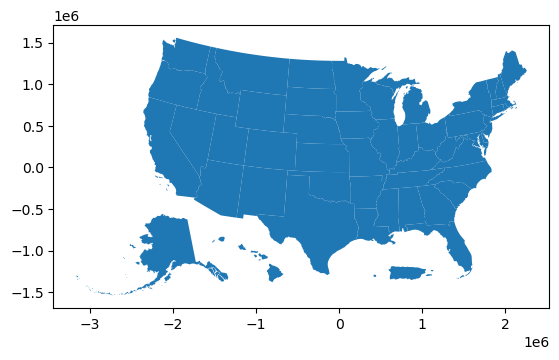

In [34]:
us = states(cb = True, resolution = "20m", year=2023)
us_rescaled = shift_geometry(us)
us_rescaled.plot()

In [35]:
# Join the data to geography
us_rescaled.head()

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,48,01779801,0400000US48,48,TX,Texas,00,676686238592,18982083586,"POLYGON ((-998043.807 -568739.971, -997956.109..."
1,06,01779778,0400000US06,06,CA,California,00,403673296401,20291770234,"MULTIPOLYGON (((-2066284.899 -204542.622, -205..."
2,21,01779786,0400000US21,21,KY,Kentucky,00,102266598312,2384223544,"POLYGON ((571924.530 -84268.109, 577745.348 -8..."
3,13,01705317,0400000US13,13,GA,Georgia,00,149485311347,4419673221,"POLYGON ((939223.082 -230281.864, 951008.202 -..."
4,55,01779806,0400000US55,55,WI,Wisconsin,00,140292627460,29343084365,"MULTIPOLYGON (((708320.068 919586.190, 715683...."


In [36]:
us_rescaled_final = us_rescaled.merge(
    df4,
    left_on=["GEOID"],
    right_on=["state"],
).drop(
    columns=["state"]
)

# Convert CRS
us_rescaled_final = us_rescaled_final.to_crs("EPSG:4326")

In [37]:
us_rescaled_final.columns

Index(['STATEFP', 'STATENS', 'GEOIDFQ', 'GEOID', 'STUSPS', 'NAME_x', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'NAME_y', 'GEO_ID', 'MedHHInc',
       'EducTotal', 'EducBelowHighSch', 'EducHighSch', 'EducAssoc', 'EducBach',
       'TotalPop', 'TotalPop16', 'LabForTotal', 'Unemployed',
       'PopPovertyDetermined', 'PovertyPop', 'PctBach', 'PovertyRate',
       'UnemploymentRate', 'LabForParticipationRate', 'netexport', 'REALGDP',
       'life_expectancy', 'Labor_Productivity_2023', 'REALGDPpercapita'],
      dtype='object')